## Calcul du plan des moindres carrés à partir d'un nuage de points

Le code suivant permet de calculer et d'afficher le plan des moindres carrés à partir d'un nuage de points décrit dans le fichier "nuage_de_point.txt"


##### Importation des librairies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Importation des données

In [5]:
df = pd.read_csv("nuage_de_points.txt", sep="\t", decimal=",")
x = df["X"].values
y = df["Y"].values
z = df["Z"].values

df.head()

,X,Y,Z
0,1,1,-2.083333
1,1,2,-3.450000
2,1,3,-4.066667
3,1,4,-4.083333
4,1,5,-4.900000


##### Calcul du plan des moindres carrés

Il s'agit de trouver le plan d'équation
$$ 
z = ax + by + c
$$
tel que les paramètres $a, b, c$ minimisent la somme des carrés des distances verticales (selon Z) entre les points du nuage de point considéré et le plan.



Pour cela, on peut utiliser la fonction `numpy.linalg.lstsq`. La fonction prend en argument :
$$
M =
\begin{bmatrix}
X_1 & Y_1 & 1 \\
X_2 & Y_2 & 1 \\
\vdots & \vdots & \vdots \\
X_n & Y_n & 1
\end{bmatrix}
$$
la matrice des coordonnées $x_i$ et $y_i$ des points du nuage considéré, et

$$
Z =
\begin{bmatrix}
Z_1 \\
Z_2 \\
\vdots \\
Z_n
\end{bmatrix}
$$
la matrice des coordonnées $z_i$ des points du nuage considéré.

In [ ]:
n = len(x)
M = np.array([[x[i], y[i], 1] for i in range(n)])

param = np.linalg.lstsq(M, z)[0]

print(f"Paramètres du plan : a = {param[0]}, b = {param[1]}, c = {param[2]}")


Paramètres du plan : a = -0.2903333333400044, b = -0.6496666666599957, c = -1.5513333333200006


##### Affichage du résultat

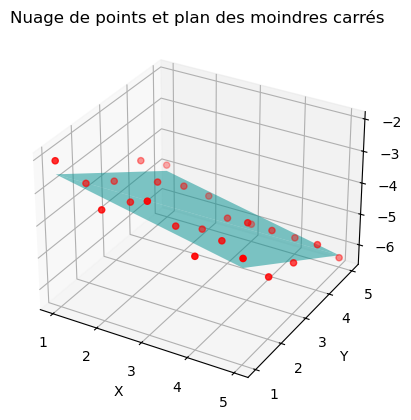

In [ ]:
X_min, X_max = min(x), max(x)
Y_min, Y_max = min(y), max(y)

X_plan = [X_min, X_min, X_max, X_max]
Y_plan = [Y_min, Y_max, Y_min, Y_max]
Z_plan = [param[0]*X_plan[0] + param[1]*Y_plan[0] + param[2],
           param[0]*X_plan[1] + param[1]*Y_plan[1] + param[2],
           param[0]*X_plan[2] + param[1]*Y_plan[2] + param[2],
           param[0]*X_plan[3] + param[1]*Y_plan [3] + param[2]]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='red')
ax.plot_trisurf(X_plan, Y_plan, Z_plan, color='cyan', alpha=0.5)

ax.set_title("Nuage de points et plan des moindres carrés")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()